# Polymorphism

In [5]:
class Process:
    
    """
    Representation of Stochastic Process
    """
    
    def __init__(self, start_value = 0):
        self.value = start_value
        
    def time_step(self):
        
        # removed the exception -- was just for demo
        pass
    
    # adding str
    
    def __str__(self):
        return "this is a process with current value : " + str(self.value)
    
    # def __repr__(self):
    #     return __str__(self)
    
    
    def simulate(self, steps = 20):
        for i in range(steps):
#            print(self)
            self.time_step()
        

In [6]:
class BoundedLinearProcess(Process):
    """Stochastic process that develops linearly - increases by velocity in every
    time period. Velocity is what we will add to the class
    buonded between 0 and 1 """
    
    def __init__(self, start_value = 0, velocity = 0):
        
        # the super function just returns the super class (Process)
        # go to the initialized fuction of the parent class
        
        super().__init__(start_value)
        self.velocity = velocity
    
    def time_step(self):
        
        self.value += self.velocity
        
        if self.value < 0:
            self.value = -self.value
            self.velocity = -self.velocity
        
        if self.value > 1:
            self.value = 1- (self.value-1)
            self.velocity  = -self.velocity
        
        super().time_step
        # you can omit this -- as nothing happens in the parent class
        
        
        #--------- modify this --------
        # add tilted line graph
        
    def __str__(self):
        return " " * int(self.value*20) + "*"
    # def __repr__(self):
    #     return __str__(self)

In [7]:
# override super

import numpy as np

class ARProcess(Process):
    
    def __init__(self, alpha= 0.5, sigma = 1, start_value = 0):
        
        super().__init__(start_value)
        
        self.alpha = alpha
        self.sigma = sigma
        
    def time_step(self):
        
        self.value = self.alpha * self.value + np.random.normal(scale = self.sigma)
        
        super().time_step()
    
    def __str__(self):
        
        if self.value < 0:
            s = " " * int( 5 * (self.value + 3)) + "*" + " " * int(-self.value * 5) + "|"
            
        elif self.value == 0:
            s = " " * 15 + "*"
        
        else:
            
            s = " " * 15 + "|" + " "*int(5 * self.value) + "*"
        
        return s

In [8]:
class RandomWalk(ARProcess):
    
    def __init__(self, sigma = 0.5):
        super().__init__(alpha = 1, sigma = sigma)

---

# Start Here

## Classes become more abstract

## it becomes just a way to organize data

## Combine all

In [17]:
import numpy as np

class Process:
    
    def __init__(self, start_value = 0):
        self.value = start_value
        #---------modify ----------
        self.history = []
        
        
    def time_step(self):
        #---------modify ----------
        self.history.append(self.value)
        # adding these two lines allows all sub-classes to keep track of history
    
    def __str__(self):
        return "this is a process with current value : " + str(self.value)
    
    def simulate(self, steps = 20):
        for i in range(steps):
            self.time_step()
        

class BoundedLinearProcess(Process):
    
    def __init__(self, start_value = 0, velocity = 0):
        super().__init__(start_value)
        self.velocity = velocity
    
    def time_step(self):
        self.value += self.velocity
        if self.value < 0:
            self.value = -self.value
            self.velocity = -self.velocity
        if self.value > 1:
            self.value = 1- (self.value-1)
            self.velocity  = -self.velocity
        super().time_step()
        
    def __str__(self):
        return " " * int(self.value*20) + "*"


class ARProcess(Process):
    
    def __init__(self, alpha= 0.5, sigma = 1, start_value = 0):
        super().__init__(start_value)
        self.alpha = alpha
        self.sigma = sigma
        
    def time_step(self):
        self.value = self.alpha * self.value + np.random.normal(scale = self.sigma)
        super().time_step()
    
    def __str__(self):
        if self.value < 0:
            s = " " * int( 5 * (self.value + 3)) + "*" + " " * int(-self.value * 5) + "|"
        elif self.value == 0:
            s = " " * 15 + "*"
        else:
            s = " " * 15 + "|" + " "*int(5 * self.value) + "*"
        return s

class RandomWalk(ARProcess):
    
    def __init__(self, sigma = 0.5):
        super().__init__(alpha = 1, sigma = sigma)

## Create an abstract base class for managing plotting charts

In [13]:
class ProcessPlotter:
    
    # consider this as an abtract base class
    
    def __init__(self, process = None):
        self.process = process
    
    def plot(self):
        pass
        

In [20]:
class TextProcessPlotter(ProcessPlotter):
    
    # put in the * like before
    def plot(self):
        upper = max(self.process.history)
        lower = min(self.process.history)
        
        if upper == lower:
            upper += 1
        for val in self.process.history:
            print(" " * int(20 * (val - lower)/(upper-lower)) + "*")

In [21]:
p1 = ARProcess(alpha = .9)
plotter1 = TextProcessPlotter(p1)

In [22]:
p1.simulate(10)
plotter1.plot()

                    *
       *
          *
*
              *
           *
      *
  *
             *
                 *


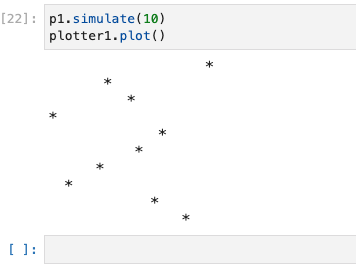

In [23]:
p2 = RandomWalk()
plotter2 = TextProcessPlotter(p2)
p2.simulate()
plotter2.plot()

*
   *
     *
     *
  *
 *
 *
*
   *
  *
*
  *
        *
            *
              *
            *
                    *
                  *
                *
               *


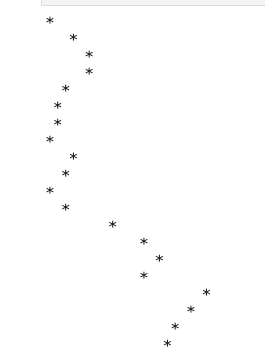

---

### Let us create a nicer plotter

In [24]:
import matplotlib
%matplotlib inline
# allows plot to show inline

class GraphicProcessPlotter(ProcessPlotter):
    
    def plot(self):
        matplotlib.pyplot.plot(self.process.history)
        matplotlib.pyplot.title("Process Time Plot")

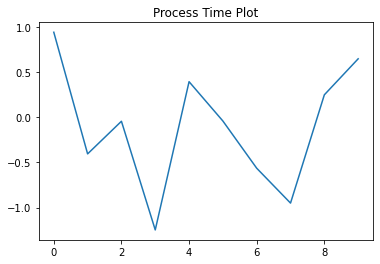

In [25]:
plotter3 = GraphicProcessPlotter(p1)
plotter3.plot()

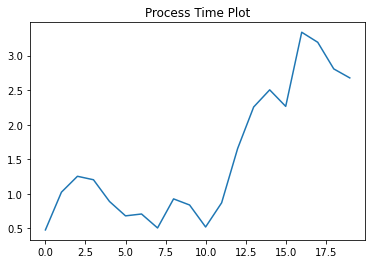

In [26]:
plotter4 = GraphicProcessPlotter(p2)
plotter4.plot()